In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.baseline import BaselineGeneticAlgorithm
from src.crossovers import mean_crossover
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 300
DIMENSION_SIZE = 3
CONSTRAINTS = (-4, 4)
RANDOM_STATE = 100

In [3]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

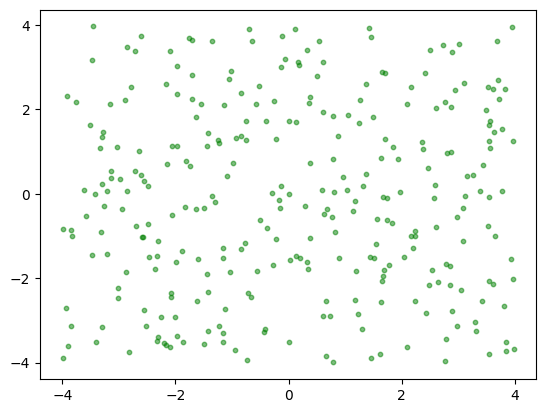

In [4]:
x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [5]:
from typing import Sequence


def function_1(pop: Sequence[float]):
    first = np.power(pop - 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

def function_2(pop: Sequence[float]):
    first = np.power(pop + 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

function_1([3, 4])
function_2([3, 4])

0.9999999999999998

In [6]:
algo = BaselineGeneticAlgorithm(
    state=current_state,
    eval_functions=[function_1, function_2],
    mutation_function=square_mutation,
    mating_function=mean_crossover,
)

In [7]:
algo.get_best()

[[0.5958067361867077, 0.10293014475030127, 0.435814464575472],
 [0.005672946670356893, 0.007116033229406682, 0.871224830533925],
 [-0.29979018158483406, 0.020948513301724425, -0.10206765006247842],
 [-0.16605614502530397, -0.14266383610231603, 0.21236332834888128],
 [-0.3901042868708844, -0.8147553611786753, -0.3400983102484112]]

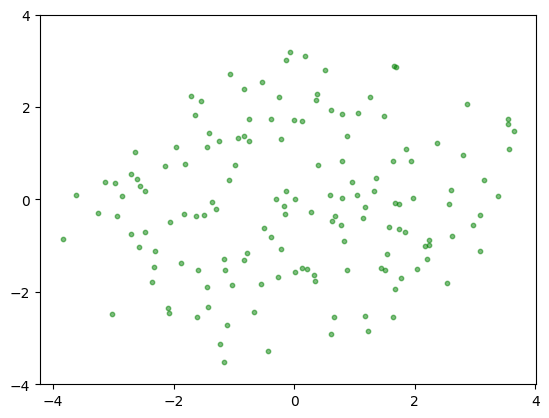

In [8]:
algo.select(keep_share=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

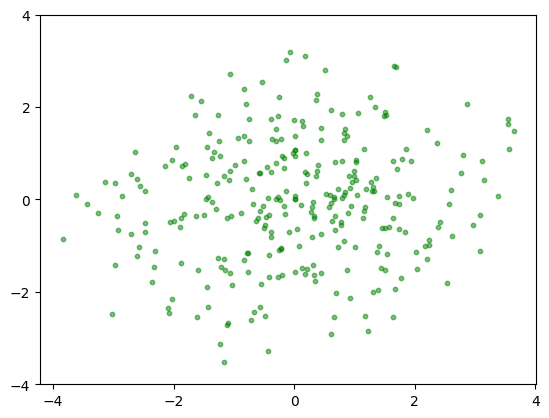

In [9]:
algo.mate()

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

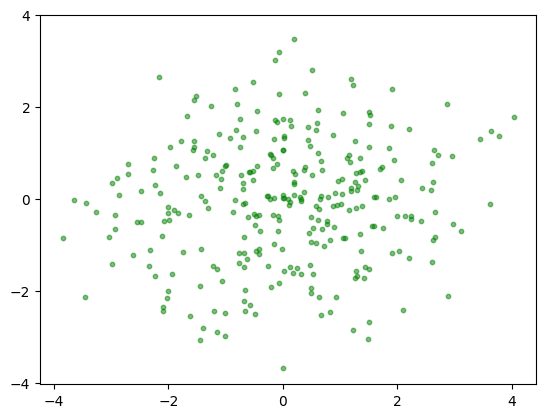

In [10]:
algo.mutate(delta=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [11]:
algo.get_best()

[[0.3122714850696031, -0.014469890621883308, 0.13957755131394034],
 [-0.49778690132297176, -0.32027231945919854, -0.5879820525388411],
 [0.12149860319210182, -0.0624525570430986, -0.4078953321434915],
 [0.19487895282719703, 0.08910856690626923, 0.2603006952939029],
 [0.1986411587440673, 0.3254862847093061, 0.2992412167440518],
 [0.011289321726367874, 0.07739404046836462, 0.3139414386564092],
 [-0.4635030747153408, -0.3765527482747575, 0.14542950225324214],
 [0.11304423879707048, -0.12882734265063878, -0.36206188524101357],
 [-0.4157947480677118, -0.3440635166547015, -0.6263483474359606],
 [0.30642373964202063, 0.03894596454207766, -0.39452353209567304],
 [0.3793936401626379, 0.6953290753433361, 0.700530252477871]]

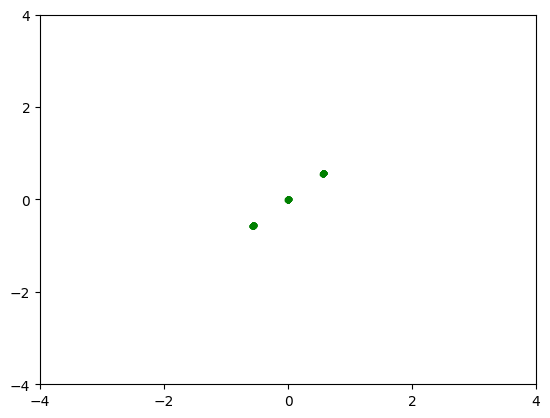

In [12]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [13]:
algo.get_best()

[[0.558853300783577, 0.5599473487308257, 0.5614031108941269],
 [0.5634829012703545, 0.5636048684794649, 0.5637745465382569],
 [-0.5702158738650924, -0.5706221446642998, -0.569534043099533],
 [-0.54729201477199, -0.5537778038712654, -0.553896503539595],
 [0.5733609098833473, 0.5775198955963646, 0.5755581876930481],
 [-0.5708674695609454, -0.5689109160684643, -0.5692505879718883],
 [0.5587644873434544, 0.5577436886310195, 0.556182411260528],
 [0.5703977837267442, 0.5701629697381299, 0.5707448819991124],
 [-0.5546268613326396, -0.54990158899147, -0.5566281767267905],
 [0.5613933554566197, 0.5562827289549818, 0.5609568445539866],
 [0.5683261961096018, 0.5678554724629323, 0.5683319553969169],
 [0.5594113987237024, 0.5641619326774294, 0.5580232435783494],
 [-0.5677103403100121, -0.5670689566279481, -0.5677716684472079],
 [-0.5727612429723385, -0.5726319101832622, -0.5743828474455204],
 [-0.5581542337073798, -0.5607414828252829, -0.5576418939676713],
 [0.5686529681127144, 0.569059702081573, 0